In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
import pandas as pd

tsla_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_data1.csv')
ndxl_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDXL_Normalised_OHLC_VWAP_VOL.csv')
tsla_norm_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_Normalised_OHLC_VWAP_VOL.csv')


In [15]:
tsla_norm_data.loc[tsla_norm_data['Close_Price'] == 0, 'Close_Price'] = None
tsla_norm_data['Close_Price'] = tsla_norm_data['Close_Price'].ffill()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Close_Price'].pct_change()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)
tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].fillna(0)  

drift = tsla_norm_data['Daily_Return'].mean()

volatility = tsla_norm_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")




Drift (Average Return): 0.005140
Volatility (Standard Deviation): 0.078022


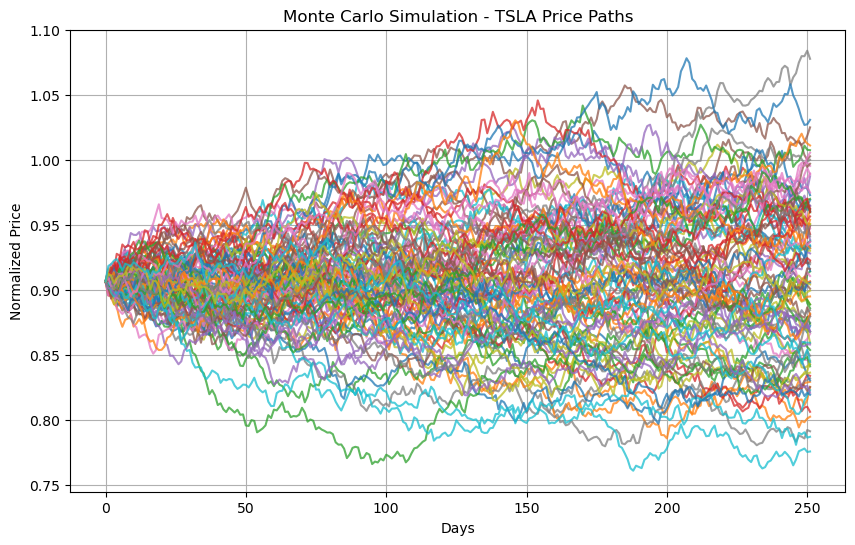

All simulations saved as /Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Images//all_simulations.png


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

S0 = tsla_norm_data['Close_Price'].iloc[-1]  
T = 252  
N = 10000  
dt = 1 / T  

price_paths = np.zeros((T, N))
price_paths[0] = S0  

for t in range(1, T):
    random_shocks = np.random.normal(0, 1, N)  
    price_paths[t] = price_paths[t - 1] * np.exp(
        (drift - 0.5 * volatility**2) * dt + volatility * random_shocks * np.sqrt(dt)
    )

output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Images/'
os.makedirs(output_dir, exist_ok=True)  

plt.figure(figsize=(10, 6))
plt.plot(price_paths[:, :100], alpha=0.75)  
plt.title("Monte Carlo Simulation - TSLA Price Paths")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.grid(True)

all_simulations_filename = f'{output_dir}/all_simulations.png'
plt.savefig(all_simulations_filename, dpi=300, bbox_inches='tight')
plt.show()  

print(f"All simulations saved as {all_simulations_filename}")


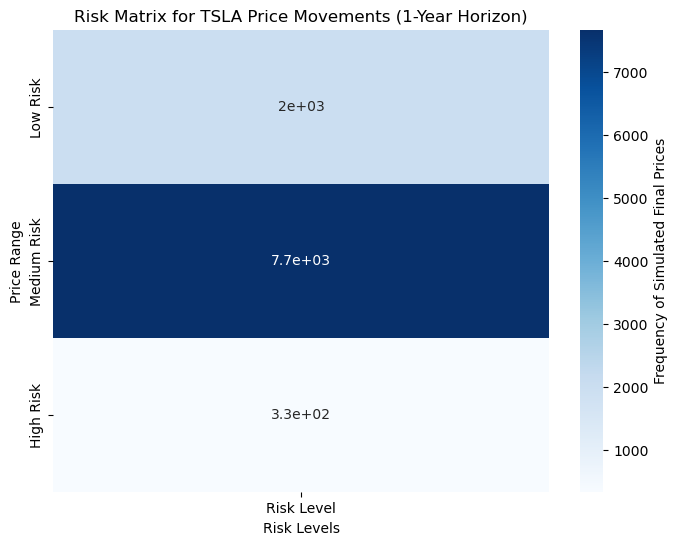

<Figure size 640x480 with 0 Axes>

Risk matrix saved as /Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Images//risk_matrix_1_year.png


In [18]:
final_prices = price_paths[-1]

low_risk_threshold = 0.85  
high_risk_threshold = 1.05  

low_risk = final_prices[final_prices < low_risk_threshold]
medium_risk = final_prices[(final_prices >= low_risk_threshold) & (final_prices <= high_risk_threshold)]
high_risk = final_prices[final_prices > high_risk_threshold]

low_risk_count = len(low_risk)
medium_risk_count = len(medium_risk)
high_risk_count = len(high_risk)

risk_matrix = np.array([[low_risk_count], [medium_risk_count], [high_risk_count]])

plt.figure(figsize=(8, 6))
sns.heatmap(risk_matrix, annot=True, cmap='Blues', xticklabels=['Risk Level'], yticklabels=['Low Risk', 'Medium Risk', 'High Risk'], cbar_kws={'label': 'Frequency of Simulated Final Prices'})
plt.title("Risk Matrix for TSLA Price Movements (1-Year Horizon)")
plt.xlabel("Risk Levels")
plt.ylabel("Price Range")
plt.show()

output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Images/'
os.makedirs(output_dir, exist_ok=True)
risk_matrix_filename = f'{output_dir}/risk_matrix_1_year.png'
plt.savefig(risk_matrix_filename, dpi=300, bbox_inches='tight')
plt.show()  

print(f"Risk matrix saved as {risk_matrix_filename}")
